In [135]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [136]:
# Load the dataset from the csv file using pandas
df = pd.read_csv('H2HBABBA2708.csv')

In [137]:
# it gives an overview about a DataFrame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [138]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200307138,UTZ Q corp,2019-08-02 00:00:00,2019.0,1.929589e+09,2019-07-11,20190708,20190711,20190810.0,USD,RV,1.0,NaN,58506.00,20190711.0,NAD5,1.929589e+09,0
1,U001,0200416837,DEC associates,2019-12-10 00:00:00,2019.0,1.930217e+09,2019-12-04,20191204,20191204,20191211.0,USD,RV,1.0,NaN,11603.08,20191201.0,NAM2,1.930217e+09,0
2,U001,0200435191,C& associates,NaN,2020.0,1.930729e+09,2020-04-07,20200401,20200407,20200422.0,USD,RV,1.0,NaN,17554.65,20200407.0,NAC6,1.930729e+09,1
3,U001,0200331749,SYSC systems,2019-03-08 00:00:00,2019.0,1.928820e+09,2019-02-19,20190218,20190219,20190306.0,USD,RV,1.0,NaN,957.19,20190219.0,NAA8,1.928820e+09,0
4,U001,200780383,MEIJ co,2019-05-16 00:00:00,2019.0,1.929232e+09,2019-04-30,20190430,20190430,20190515.0,USD,RV,1.0,NaN,72992.31,20190430.0,NAA8,1.929232e+09,0


In [139]:
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200769623,WAL-MAR foundation,2019-06-12 00:00:00,2019.0,1.929378e+09,2019-05-26,20190525,20190526,20190610.0,USD,RV,1.0,NaN,65915.34,20190526.0,NAH4,1.929378e+09,0
49996,U001,0200726979,BJ'S corporation,NaN,2020.0,1.930586e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,NaN,567.14,20200304.0,NAA8,1.930586e+09,1
49997,U001,0200726979,BJ'S systems,2019-02-19 00:00:00,2019.0,1.928719e+09,2019-02-01,20190131,20190201,20190216.0,USD,RV,1.0,NaN,1036.10,20190201.0,NAA8,1.928719e+09,0
49998,CA02,0140104225,SAVE-ON- foundation,2019-02-12 00:00:00,2019.0,2.960524e+09,2019-01-25,20190125,20190125,20190204.0,CAD,RV,1.0,NaN,109705.61,20190125.0,CA10,2.960524e+09,0
49999,U001,0200762301,C&S WH,2019-08-28 00:00:00,2019.0,1.929738e+09,2019-08-13,20190813,20190813,20190828.0,USD,RV,1.0,NaN,12597.66,20190813.0,NAC6,1.929738e+09,0


In [140]:
# it stores the number of rows and columns as a tuple
df.shape

(50000, 19)

In [141]:
# explore the data
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [142]:
# it calculates some basic statistical details
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999300e+04,50000.000000
mean,2019.305000,2.011140e+09,2.019350e+07,2.019353e+07,2.019368e+07,1.0,NaN,3.248778e+04,2.019354e+07,2.010091e+09,0.200000
std,0.460412,2.885069e+08,4.490224e+03,4.471983e+03,4.468796e+03,0.0,NaN,4.103086e+04,4.471211e+03,2.745795e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018102e+07,2.018110e+07,1.0,NaN,1.700000e-01,2.018102e+07,1.928502e+09,0.000000
25%,2019.000000,1.929344e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4.788748e+03,2.019051e+07,1.929344e+09,0.000000
50%,2019.000000,1.929962e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,1.758069e+04,2.019091e+07,1.929961e+09,0.000000
75%,2020.000000,1.930620e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,4.710175e+04,2.020013e+07,1.930620e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.673456e+06,2.020052e+07,2.960636e+09,1.000000


# Preprocessing the data

## Null imputation

In [143]:
# it shows how many null values are there in a DataFrame
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [144]:
# it drops the column with all null values
df.dropna(how='all', axis=1, inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200307138,UTZ Q corp,2019-08-02 00:00:00,2019.0,1.929589e+09,2019-07-11,20190708,20190711,20190810.0,USD,RV,1.0,58506.00,20190711.0,NAD5,1.929589e+09,0
1,U001,0200416837,DEC associates,2019-12-10 00:00:00,2019.0,1.930217e+09,2019-12-04,20191204,20191204,20191211.0,USD,RV,1.0,11603.08,20191201.0,NAM2,1.930217e+09,0
2,U001,0200435191,C& associates,NaN,2020.0,1.930729e+09,2020-04-07,20200401,20200407,20200422.0,USD,RV,1.0,17554.65,20200407.0,NAC6,1.930729e+09,1
3,U001,0200331749,SYSC systems,2019-03-08 00:00:00,2019.0,1.928820e+09,2019-02-19,20190218,20190219,20190306.0,USD,RV,1.0,957.19,20190219.0,NAA8,1.928820e+09,0
4,U001,200780383,MEIJ co,2019-05-16 00:00:00,2019.0,1.929232e+09,2019-04-30,20190430,20190430,20190515.0,USD,RV,1.0,72992.31,20190430.0,NAA8,1.929232e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,2019-06-12 00:00:00,2019.0,1.929378e+09,2019-05-26,20190525,20190526,20190610.0,USD,RV,1.0,65915.34,20190526.0,NAH4,1.929378e+09,0
49996,U001,0200726979,BJ'S corporation,NaN,2020.0,1.930586e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,567.14,20200304.0,NAA8,1.930586e+09,1
49997,U001,0200726979,BJ'S systems,2019-02-19 00:00:00,2019.0,1.928719e+09,2019-02-01,20190131,20190201,20190216.0,USD,RV,1.0,1036.10,20190201.0,NAA8,1.928719e+09,0
49998,CA02,0140104225,SAVE-ON- foundation,2019-02-12 00:00:00,2019.0,2.960524e+09,2019-01-25,20190125,20190125,20190204.0,CAD,RV,1.0,109705.61,20190125.0,CA10,2.960524e+09,0


In [145]:
# it shows how many unique values are there in every column
df.nunique()

business_code                 6
cust_number                1414
name_customer              4143
clear_date                  393
buisness_year                 2
doc_id                    48844
posting_date                504
document_create_date        505
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44203
baseline_create_date        510
cust_payment_terms           72
invoice_id                48837
isOpen                        2
dtype: int64

In [146]:
# it drops the duplicate values present in the specific column
df.drop_duplicates(subset ="doc_id", keep = False, inplace = True)
df.drop_duplicates(subset ="invoice_id", keep = False, inplace = True)

In [147]:
# it shows how many unique values are there in every column
df.nunique()

business_code                 6
cust_number                1404
name_customer              4099
clear_date                  392
buisness_year                 2
doc_id                    47699
posting_date                504
document_create_date        505
document_create_date.1      504
due_in_date                 543
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         43221
baseline_create_date        508
cust_payment_terms           72
invoice_id                47699
isOpen                        2
dtype: int64

In [148]:
# it will drop the entire column present in the DataFrame
df.drop(['document type', 'posting_id', 'document_create_date.1'], axis=1, inplace=True)

In [149]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200307138,UTZ Q corp,2019-08-02 00:00:00,2019.0,1.929589e+09,2019-07-11,20190708,20190810.0,USD,58506.00,20190711.0,NAD5,1.929589e+09,0
1,U001,0200416837,DEC associates,2019-12-10 00:00:00,2019.0,1.930217e+09,2019-12-04,20191204,20191211.0,USD,11603.08,20191201.0,NAM2,1.930217e+09,0
2,U001,0200435191,C& associates,NaN,2020.0,1.930729e+09,2020-04-07,20200401,20200422.0,USD,17554.65,20200407.0,NAC6,1.930729e+09,1
3,U001,0200331749,SYSC systems,2019-03-08 00:00:00,2019.0,1.928820e+09,2019-02-19,20190218,20190306.0,USD,957.19,20190219.0,NAA8,1.928820e+09,0
4,U001,200780383,MEIJ co,2019-05-16 00:00:00,2019.0,1.929232e+09,2019-04-30,20190430,20190515.0,USD,72992.31,20190430.0,NAA8,1.929232e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,2019-06-12 00:00:00,2019.0,1.929378e+09,2019-05-26,20190525,20190610.0,USD,65915.34,20190526.0,NAH4,1.929378e+09,0
49996,U001,0200726979,BJ'S corporation,NaN,2020.0,1.930586e+09,2020-03-04,20200303,20200319.0,USD,567.14,20200304.0,NAA8,1.930586e+09,1
49997,U001,0200726979,BJ'S systems,2019-02-19 00:00:00,2019.0,1.928719e+09,2019-02-01,20190131,20190216.0,USD,1036.10,20190201.0,NAA8,1.928719e+09,0
49998,CA02,0140104225,SAVE-ON- foundation,2019-02-12 00:00:00,2019.0,2.960524e+09,2019-01-25,20190125,20190204.0,CAD,109705.61,20190125.0,CA10,2.960524e+09,0


In [150]:
# datatypes of the present DataFrame
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
isOpen                    int64
dtype: object

In [151]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200307138,UTZ Q corp,2019-08-02 00:00:00,2019.0,1.929589e+09,2019-07-11,20190708,20190810.0,USD,58506.00,20190711.0,NAD5,1.929589e+09,0
1,U001,0200416837,DEC associates,2019-12-10 00:00:00,2019.0,1.930217e+09,2019-12-04,20191204,20191211.0,USD,11603.08,20191201.0,NAM2,1.930217e+09,0
2,U001,0200435191,C& associates,NaN,2020.0,1.930729e+09,2020-04-07,20200401,20200422.0,USD,17554.65,20200407.0,NAC6,1.930729e+09,1
3,U001,0200331749,SYSC systems,2019-03-08 00:00:00,2019.0,1.928820e+09,2019-02-19,20190218,20190306.0,USD,957.19,20190219.0,NAA8,1.928820e+09,0
4,U001,200780383,MEIJ co,2019-05-16 00:00:00,2019.0,1.929232e+09,2019-04-30,20190430,20190515.0,USD,72992.31,20190430.0,NAA8,1.929232e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,2019-06-12 00:00:00,2019.0,1.929378e+09,2019-05-26,20190525,20190610.0,USD,65915.34,20190526.0,NAH4,1.929378e+09,0
49996,U001,0200726979,BJ'S corporation,NaN,2020.0,1.930586e+09,2020-03-04,20200303,20200319.0,USD,567.14,20200304.0,NAA8,1.930586e+09,1
49997,U001,0200726979,BJ'S systems,2019-02-19 00:00:00,2019.0,1.928719e+09,2019-02-01,20190131,20190216.0,USD,1036.10,20190201.0,NAA8,1.928719e+09,0
49998,CA02,0140104225,SAVE-ON- foundation,2019-02-12 00:00:00,2019.0,2.960524e+09,2019-01-25,20190125,20190204.0,CAD,109705.61,20190125.0,CA10,2.960524e+09,0


In [152]:
# convert to datetime
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])

In [153]:
# convert float datatype to integer datatype
df['buisness_year'] = df['buisness_year'].astype(int)

In [154]:
# it will sort according to document_create_date
df.sort_values('document_create_date',inplace=True)

In [155]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
32999,U001,0200769623,WAL-MAR,2019-01-15,2019,1.928540e+09,2019-01-03,2018-12-29,2019-01-18,USD,15898.04,2019-01-03,NAH4,1.928540e+09,0
48011,U001,0200418007,AM us,2019-01-17,2019,1.928533e+09,2019-01-02,2018-12-29,2019-01-17,USD,1513.14,2019-01-02,NAA8,1.928533e+09,0
38525,U001,0200794332,COST corporation,2019-01-17,2019,1.928536e+09,2018-12-31,2018-12-29,2019-01-15,USD,11654.38,2018-12-31,NAAX,1.928536e+09,0
40677,U001,0200726979,BJ'S us,2019-01-15,2019,1.928540e+09,2018-12-31,2018-12-29,2019-01-15,USD,58.18,2018-12-31,NAA8,1.928540e+09,0
20138,U001,0200704858,WAKE corporation,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,17704.32,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44869,CA02,0140104392,FLANAG llc,NaT,2020,2.960634e+09,2020-05-14,2020-05-14,2020-05-24,CAD,7032.80,2020-05-14,CA10,2.960634e+09,1
2564,CA02,0100056054,ACTIVE M associates,NaT,2020,2.960636e+09,2020-05-16,2020-05-16,2020-05-30,CAD,11210.71,2020-05-20,CA10,2.960636e+09,1
35383,CA02,0100027744,OMEGA AD corp,NaT,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,2.960634e+09,1
11282,CA02,0100056054,ACTIVE M,NaT,2020,2.960636e+09,2020-05-18,2020-05-18,2020-06-04,CAD,8368.79,2020-05-25,CA10,2.960636e+09,1


In [156]:
df['delay'] = (df['clear_date']-df['due_in_date']).dt.days

# Removing the datapoints where the target value is null

### delay is the target column

#### delay is a continuous variable

In [157]:
train_data = df[df.delay.notnull()]

In [158]:
# currency conversion
train_data[train_data["invoice_currency"]=="CAD"]["total_open_amount"]*0.81

5224      55140.9768
3479       4970.2896
7065      90891.1854
24009      1636.3539
46220    109308.8196
            ...     
32037     23041.8027
49092      3364.0110
28728     90325.0359
1382       8672.1840
45093     63549.1413
Name: total_open_amount, Length: 3018, dtype: float64

In [159]:
train_data.drop(['invoice_currency'],axis=1,inplace=True)
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
32999,U001,0200769623,WAL-MAR,2019-01-15,2019,1.928540e+09,2019-01-03,2018-12-29,2019-01-18,15898.04,2019-01-03,NAH4,1.928540e+09,0,-3.0
48011,U001,0200418007,AM us,2019-01-17,2019,1.928533e+09,2019-01-02,2018-12-29,2019-01-17,1513.14,2019-01-02,NAA8,1.928533e+09,0,0.0
38525,U001,0200794332,COST corporation,2019-01-17,2019,1.928536e+09,2018-12-31,2018-12-29,2019-01-15,11654.38,2018-12-31,NAAX,1.928536e+09,0,2.0
40677,U001,0200726979,BJ'S us,2019-01-15,2019,1.928540e+09,2018-12-31,2018-12-29,2019-01-15,58.18,2018-12-31,NAA8,1.928540e+09,0,0.0
20138,U001,0200704858,WAKE corporation,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,17704.32,2018-12-30,NAA8,1.928541e+09,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29306,U001,0200769623,WAL-MAR,2020-03-10,2020,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,38240.31,2020-02-26,NAH4,1.930576e+09,0,-2.0
40883,U001,0200331749,SYSC trust,2020-03-16,2020,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,8976.54,2020-02-26,NAA8,1.930577e+09,0,4.0
45093,CA02,0140106408,WAL-M,2020-03-13,2020,2.960617e+09,2020-02-26,2020-02-27,2020-03-08,78455.73,2020-02-27,CA10,2.960617e+09,0,5.0
34748,U001,0200434439,BAUGH SU,2020-03-16,2020,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,60326.38,2020-02-26,NAA8,1.930577e+09,0,4.0


In [160]:
test_data = df[df.delay.isnull()]

In [161]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45849,U001,CCCA02,KRAFT systems,NaT,2020,1.930544e+09,2020-02-27,2020-02-19,2020-04-02,USD,82143.60,2020-02-27,NAG2,1.930544e+09,1,NaN
46788,U001,0200769623,WAL-MAR llc,NaT,2020,1.930543e+09,2020-02-27,2020-02-19,2020-03-13,USD,2900.73,2020-02-27,NAH4,1.930543e+09,1,NaN
32211,U001,0200799367,MCL foundation,NaT,2020,1.930544e+09,2020-02-28,2020-02-19,2020-03-14,USD,21208.47,2020-02-28,NAA8,1.930544e+09,1,NaN
10629,U001,0200769623,WAL-MAR in,NaT,2020,1.930548e+09,2020-02-27,2020-02-20,2020-03-13,USD,3073.33,2020-02-27,NAH4,1.930548e+09,1,NaN
39679,U001,0200769623,WAL-MAR us,NaT,2020,1.930559e+09,2020-02-27,2020-02-23,2020-03-13,USD,66980.80,2020-02-27,NAH4,1.930559e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44869,CA02,0140104392,FLANAG llc,NaT,2020,2.960634e+09,2020-05-14,2020-05-14,2020-05-24,CAD,7032.80,2020-05-14,CA10,2.960634e+09,1,NaN
2564,CA02,0100056054,ACTIVE M associates,NaT,2020,2.960636e+09,2020-05-16,2020-05-16,2020-05-30,CAD,11210.71,2020-05-20,CA10,2.960636e+09,1,NaN
35383,CA02,0100027744,OMEGA AD corp,NaT,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,2.960634e+09,1,NaN
11282,CA02,0100056054,ACTIVE M,NaT,2020,2.960636e+09,2020-05-18,2020-05-18,2020-06-04,CAD,8368.79,2020-05-25,CA10,2.960636e+09,1,NaN


In [162]:
train_data.shape,test_data.shape

((38262, 15), (9437, 16))

### Constant / Duplicate removal

In [163]:
train_data.cov()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen,delay
buisness_year,0.114048,-9.761695e+05,-1.010223e+02,-9.761695e+05,0.0,-6.717930e-03
doc_id,-976169.478716,7.712157e+16,2.159691e+12,7.712157e+16,0.0,3.883340e+08
total_open_amount,-101.022270,2.159691e+12,1.737306e+09,2.159691e+12,0.0,5.080600e+03
invoice_id,-976169.478716,7.712157e+16,2.159691e+12,7.712157e+16,0.0,3.883340e+08
isOpen,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
delay,-0.006718,3.883340e+08,5.080600e+03,3.883340e+08,0.0,1.195827e+02


In [164]:
train_data.drop(['isOpen','clear_date'], axis=1, inplace=True)

In [165]:
# other ways to check for variance --> nunique, value_counts
train_data.nunique()

business_code               6
cust_number              1333
name_customer            3846
buisness_year               2
doc_id                  38262
posting_date              424
document_create_date      426
due_in_date               488
total_open_amount       34796
baseline_create_date      433
cust_payment_terms         67
invoice_id              38262
delay                     177
dtype: int64

In [166]:
# For categorical columns with relatively low unique value (<= 6) -- looking for value_counts
# if unique count ==1 , constant column 

for col in train_data.columns:
    if train_data[col].nunique()<= 6:
        print(train_data[col].value_counts())
        print('------------------------------')

U001    34593
CA02     3018
U013      531
U002      109
U005       10
U007        1
Name: business_code, dtype: int64
------------------------------
2019    33239
2020     5023
Name: buisness_year, dtype: int64
------------------------------


In [167]:
# clubbing business_codes with low occurance in dataset - to ensure model gets max information
train_data['business_code'] = np.where(train_data['business_code'].isin(["U005", "U007"]),"Other business_codes",train_data['business_code'])

# Split Data

In [168]:

# Converting the train_data into X and Y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = train_data.drop('delay',axis=1)

# Y --> contains only the target value 
Y = train_data['delay']

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,Y_train,Y_inter_test = train_test_split(X,Y,test_size=0.3,random_state=0 , shuffle = False)

In [170]:
X_valid,X_test,Y_valid,Y_test = train_test_split(X_inter_test,Y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [171]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
32999,U001,0200769623,WAL-MAR,2019,1.928540e+09,2019-01-03,2018-12-29,2019-01-18,15898.04,2019-01-03,NAH4,1.928540e+09
48011,U001,0200418007,AM us,2019,1.928533e+09,2019-01-02,2018-12-29,2019-01-17,1513.14,2019-01-02,NAA8,1.928533e+09
38525,U001,0200794332,COST corporation,2019,1.928536e+09,2018-12-31,2018-12-29,2019-01-15,11654.38,2018-12-31,NAAX,1.928536e+09
40677,U001,0200726979,BJ'S us,2019,1.928540e+09,2018-12-31,2018-12-29,2019-01-15,58.18,2018-12-31,NAA8,1.928540e+09
20138,U001,0200704858,WAKE corporation,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,17704.32,2018-12-30,NAA8,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
41283,U001,0200769623,WAL-MAR corp,2019,1.929983e+09,2019-10-07,2019-10-08,2019-10-22,6442.90,2019-10-07,NAH4,1.929983e+09
38182,U001,0200793088,DEMOU foundation,2019,1.929984e+09,2019-10-10,2019-10-08,2019-10-25,180749.21,2019-10-10,NAA8,1.929984e+09
41071,U001,CCU013,KRAFT F,2019,1.929984e+09,2019-10-08,2019-10-08,2019-10-08,11398.80,2019-10-08,NAX2,1.929984e+09
13718,U001,0200759878,SA foundation,2019,1.929984e+09,2019-10-11,2019-10-08,2019-10-26,34200.53,2019-10-11,NAH4,1.929984e+09


In [172]:
X_valid

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
8752,U001,0200705089,JETR co,2019,1.929983e+09,2019-10-09,2019-10-08,2019-10-24,3110.86,2019-10-09,NAA8,1.929983e+09
16374,U001,0200769623,WAL-MAR co,2019,1.929984e+09,2019-10-09,2019-10-08,2019-10-24,6532.60,2019-10-09,NAH4,1.929984e+09
31690,U001,0200726979,BJ'S trust,2019,1.929988e+09,2019-10-04,2019-10-08,2019-10-19,1224.98,2019-10-04,NAA8,1.929988e+09
9617,U001,0200726979,BJ'S,2019,1.929988e+09,2019-10-08,2019-10-08,2019-10-23,465.15,2019-10-08,NAA8,1.929988e+09
39155,CA02,0140104440,SO foundation,2019,2.960585e+09,2019-10-08,2019-10-08,2019-10-26,66719.87,2019-10-16,CA10,2.960585e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
41789,U001,0200769623,WAL-MAR corp,2019,1.930255e+09,2019-12-11,2019-12-09,2019-12-26,16101.23,2019-12-11,NAH4,1.930255e+09
2292,CA02,0140104440,SO corporation,2019,2.960599e+09,2019-12-08,2019-12-09,2019-12-18,155083.22,2019-12-08,CA10,2.960599e+09
32100,U001,0200705742,DOT corporation,2019,1.930255e+09,2019-12-09,2019-12-09,2020-01-10,80935.36,2019-12-09,NA32,1.930255e+09
9052,U001,0200936373,SUPE corp,2019,1.930254e+09,2019-12-09,2019-12-09,2019-12-24,53880.65,2019-12-09,NAA8,1.930254e+09


In [173]:
X_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
17611,U001,0200769623,WAL-MAR corporation,2019,1.930256e+09,2019-12-11,2019-12-09,2019-12-26,15739.17,2019-12-11,NAH4,1.930256e+09
11196,U001,0200037027,FARN associates,2019,1.930255e+09,2019-12-09,2019-12-09,2019-12-24,13751.58,2019-12-09,NAA8,1.930255e+09
3042,U001,0200769623,WAL-MAR associates,2019,1.930252e+09,2019-12-10,2019-12-09,2019-12-25,53364.44,2019-12-10,NAH4,1.930252e+09
47275,U001,0200762301,C&S WH corporation,2019,1.930256e+09,2019-12-10,2019-12-09,2019-12-25,97827.87,2019-12-10,NAC6,1.930256e+09
36251,U001,0200704045,RA llc,2019,1.930250e+09,2019-12-08,2019-12-09,2019-12-23,4506.12,2019-12-08,NAA8,1.930250e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
29306,U001,0200769623,WAL-MAR,2020,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,38240.31,2020-02-26,NAH4,1.930576e+09
40883,U001,0200331749,SYSC trust,2020,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,8976.54,2020-02-26,NAA8,1.930577e+09
45093,CA02,0140106408,WAL-M,2020,2.960617e+09,2020-02-26,2020-02-27,2020-03-08,78455.73,2020-02-27,CA10,2.960617e+09
34748,U001,0200434439,BAUGH SU,2020,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,60326.38,2020-02-26,NAA8,1.930577e+09


In [174]:
Y_train

32999    -3.0
48011     0.0
38525     2.0
40677     0.0
20138     0.0
         ... 
41283    -1.0
38182    -1.0
41071    50.0
13718     2.0
6701      0.0
Name: delay, Length: 26783, dtype: float64

In [175]:
Y_valid

8752      0.0
16374    -3.0
31690     2.0
9617      0.0
39155     5.0
         ... 
41789    -3.0
2292      9.0
32100   -11.0
9052      2.0
41701     0.0
Name: delay, Length: 5739, dtype: float64

In [176]:
Y_test

17611    -3.0
11196     0.0
3042     -2.0
47275     1.0
36251     0.0
         ... 
29306    -2.0
40883     4.0
45093     5.0
34748     4.0
16193    46.0
Name: delay, Length: 5740, dtype: float64

In [177]:
X_train.shape , X_valid.shape , X_test.shape

((26783, 12), (5739, 12), (5740, 12))

# Exploratory Data Analysis

<AxesSubplot:xlabel='delay', ylabel='Density'>

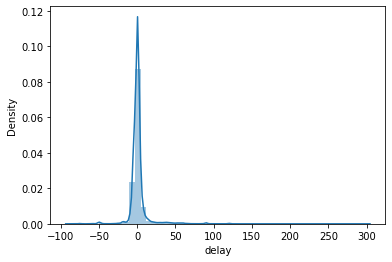

In [178]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence 
sns.distplot(Y_train)

In [179]:
X_train.merge(Y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,32999,U001,0200769623,WAL-MAR,2019,1.928540e+09,2019-01-03,2018-12-29,2019-01-18,15898.04,2019-01-03,NAH4,1.928540e+09,-3.0
1,48011,U001,0200418007,AM us,2019,1.928533e+09,2019-01-02,2018-12-29,2019-01-17,1513.14,2019-01-02,NAA8,1.928533e+09,0.0
2,38525,U001,0200794332,COST corporation,2019,1.928536e+09,2018-12-31,2018-12-29,2019-01-15,11654.38,2018-12-31,NAAX,1.928536e+09,2.0
3,40677,U001,0200726979,BJ'S us,2019,1.928540e+09,2018-12-31,2018-12-29,2019-01-15,58.18,2018-12-31,NAA8,1.928540e+09,0.0
4,20138,U001,0200704858,WAKE corporation,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,17704.32,2018-12-30,NAA8,1.928541e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26778,41283,U001,0200769623,WAL-MAR corp,2019,1.929983e+09,2019-10-07,2019-10-08,2019-10-22,6442.90,2019-10-07,NAH4,1.929983e+09,-1.0
26779,38182,U001,0200793088,DEMOU foundation,2019,1.929984e+09,2019-10-10,2019-10-08,2019-10-25,180749.21,2019-10-10,NAA8,1.929984e+09,-1.0
26780,41071,U001,CCU013,KRAFT F,2019,1.929984e+09,2019-10-08,2019-10-08,2019-10-08,11398.80,2019-10-08,NAX2,1.929984e+09,50.0
26781,13718,U001,0200759878,SA foundation,2019,1.929984e+09,2019-10-11,2019-10-08,2019-10-26,34200.53,2019-10-11,NAH4,1.929984e+09,2.0


In [180]:
X_train.merge(Y_train,on = X_train.index).groupby(['document_create_date','business_code'])['delay'].agg(['min']).unstack().T.idxmin()

document_create_date
2018-12-29    (min, U001)
2018-12-30    (min, U001)
2018-12-31    (min, U001)
2019-01-01    (min, U001)
2019-01-02    (min, U001)
                 ...     
2019-10-04    (min, U001)
2019-10-05    (min, U001)
2019-10-06    (min, U001)
2019-10-07    (min, U001)
2019-10-08    (min, U001)
Length: 284, dtype: object

In [181]:
X_train.merge(Y_train , on = X_train.index).groupby(['due_in_date','business_code'])['delay'].agg(['min']).unstack().T.idxmin()

due_in_date
2018-12-06    (min, U001)
2018-12-31    (min, U001)
2019-01-01    (min, U001)
2019-01-06    (min, U001)
2019-01-07    (min, CA02)
                 ...     
2019-12-18    (min, U001)
2019-12-24    (min, U001)
2019-12-26    (min, U001)
2020-01-11    (min, U001)
2020-01-23    (min, U001)
Length: 340, dtype: object

# Feature Engineering

In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26783 entries, 32999 to 6701
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         26783 non-null  object        
 1   cust_number           26783 non-null  object        
 2   name_customer         26783 non-null  object        
 3   buisness_year         26783 non-null  int32         
 4   doc_id                26783 non-null  float64       
 5   posting_date          26783 non-null  object        
 6   document_create_date  26783 non-null  datetime64[ns]
 7   due_in_date           26783 non-null  datetime64[ns]
 8   total_open_amount     26783 non-null  float64       
 9   baseline_create_date  26783 non-null  datetime64[ns]
 10  cust_payment_terms    26783 non-null  object        
 11  invoice_id            26783 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int32(1), object(5)
memory usage: 2.6

In [183]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [184]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
32999,2,U001
48011,2,U001
38525,2,U001
40677,2,U001
20138,2,U001
...,...,...
41283,2,U001
38182,2,U001
41071,2,U001
13718,2,U001


In [185]:
X_valid['business_code_enc'] = business_code_encoder.transform(X_valid['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [186]:
X_test[['business_code_enc','business_code']]

,business_code_enc,business_code
17611,2,U001
11196,2,U001
3042,2,U001
47275,2,U001
36251,2,U001
...,...,...
29306,2,U001
40883,2,U001
45093,0,CA02
34748,2,U001


In [187]:
X_train.drop(['business_code'], axis =1,inplace=True)
X_valid.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [188]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])

In [189]:
X_train[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
32999,754,0200769623
48011,522,0200418007
38525,825,0200794332
40677,659,0200726979
20138,617,0200704858
...,...,...
41283,754,0200769623
38182,818,0200793088
41071,1237,CCU013
13718,730,0200759878


In [190]:
X_valid['cust_number_enc'] = cust_number_encoder.fit_transform(X_valid['cust_number'])
X_test['cust_number_enc'] = cust_number_encoder.fit_transform(X_test['cust_number'])

In [191]:
X_test[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
17611,398,0200769623
11196,187,0200037027
3042,398,0200769623
47275,384,0200762301
36251,296,0200704045
...,...,...
29306,398,0200769623
40883,224,0200331749
45093,172,0140106408
34748,249,0200434439


In [192]:
X_train.drop(['cust_number'], axis =1,inplace=True)
X_valid.drop(['cust_number'],axis=1 , inplace=True)
X_test.drop(['cust_number'],axis=1 , inplace=True)

In [193]:
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])

In [194]:
X_train[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
32999,3204,WAL-MAR
48011,118,AM us
38525,683,COST corporation
40677,362,BJ'S us
20138,3179,WAKE corporation
...,...,...
41283,3207,WAL-MAR corp
38182,819,DEMOU foundation
41071,1684,KRAFT F
13718,2551,SA foundation


In [195]:
X_valid['name_customer_enc'] = name_customer_encoder.fit_transform(X_valid['name_customer'])
X_test['name_customer_enc'] = name_customer_encoder.fit_transform(X_test['name_customer'])

In [196]:
X_test[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
17611,1428,WAL-MAR corporation
11196,432,FARN associates
3042,1425,WAL-MAR associates
47275,212,C&S WH corporation
36251,1044,RA llc
...,...,...
29306,1424,WAL-MAR
40883,1273,SYSC trust
45093,1413,WAL-M
34748,120,BAUGH SU


In [197]:
X_train.drop(['name_customer'], axis =1,inplace=True)
X_valid.drop(['name_customer'],axis=1 , inplace=True)
X_test.drop(['name_customer'],axis=1 , inplace=True)

In [198]:
posting_date_encoder = LabelEncoder()
posting_date_encoder.fit(X_train['posting_date'])
X_train['posting_date_enc'] = posting_date_encoder.transform(X_train['posting_date'])

In [199]:
X_train[['posting_date_enc','posting_date']]

,posting_date_enc,posting_date
32999,4,2019-01-03
48011,3,2019-01-02
38525,1,2018-12-31
40677,1,2018-12-31
20138,0,2018-12-30
...,...,...
41283,281,2019-10-07
38182,284,2019-10-10
41071,282,2019-10-08
13718,285,2019-10-11


In [200]:
X_valid['posting_date_enc'] = posting_date_encoder.fit_transform(X_valid['posting_date'])
X_test['posting_date_enc'] = posting_date_encoder.fit_transform(X_test['posting_date'])

In [201]:
X_test[['posting_date_enc','posting_date']]

,posting_date_enc,posting_date
17611,5,2019-12-11
11196,3,2019-12-09
3042,4,2019-12-10
47275,4,2019-12-10
36251,2,2019-12-08
...,...,...
29306,81,2020-02-26
40883,81,2020-02-26
45093,81,2020-02-26
34748,81,2020-02-26


In [202]:
X_train.drop(['posting_date'], axis =1,inplace=True)
X_valid.drop(['posting_date'],axis=1 , inplace=True)
X_test.drop(['posting_date'],axis=1 , inplace=True)

In [203]:
document_create_date_encoder = LabelEncoder()
document_create_date_encoder.fit(X_train['document_create_date'])
X_train['document_create_date_enc'] = document_create_date_encoder.transform(X_train['document_create_date'])

In [204]:
X_train[['document_create_date_enc','document_create_date']]

,document_create_date_enc,document_create_date
32999,0,2018-12-29
48011,0,2018-12-29
38525,0,2018-12-29
40677,0,2018-12-29
20138,0,2018-12-29
...,...,...
41283,283,2019-10-08
38182,283,2019-10-08
41071,283,2019-10-08
13718,283,2019-10-08


In [205]:
X_valid['document_create_date_enc'] = document_create_date_encoder.fit_transform(X_valid['document_create_date'])
X_test['document_create_date_enc'] = document_create_date_encoder.fit_transform(X_test['document_create_date'])

In [206]:
X_test[['document_create_date_enc','document_create_date']]

,document_create_date_enc,document_create_date
17611,0,2019-12-09
11196,0,2019-12-09
3042,0,2019-12-09
47275,0,2019-12-09
36251,0,2019-12-09
...,...,...
29306,79,2020-02-27
40883,79,2020-02-27
45093,79,2020-02-27
34748,79,2020-02-27


In [207]:
X_train.drop(['document_create_date'], axis =1,inplace=True)
X_valid.drop(['document_create_date'],axis=1 , inplace=True)
X_test.drop(['document_create_date'],axis=1 , inplace=True)

In [208]:
due_in_date_encoder = LabelEncoder()
due_in_date_encoder.fit(X_train['due_in_date'])
X_train['due_in_date_enc'] = due_in_date_encoder.transform(X_train['due_in_date'])

In [209]:
X_train[['due_in_date_enc','due_in_date']]

,due_in_date_enc,due_in_date
32999,13,2019-01-18
48011,12,2019-01-17
38525,10,2019-01-15
40677,10,2019-01-15
20138,9,2019-01-14
...,...,...
41283,290,2019-10-22
38182,293,2019-10-25
41071,276,2019-10-08
13718,294,2019-10-26


In [210]:
X_valid['due_in_date_enc'] = due_in_date_encoder.fit_transform(X_valid['due_in_date'])
X_test['due_in_date_enc'] = due_in_date_encoder.fit_transform(X_test['due_in_date'])

In [211]:
X_test[['due_in_date_enc','due_in_date']]

,due_in_date_enc,due_in_date
17611,11,2019-12-26
11196,9,2019-12-24
3042,10,2019-12-25
47275,10,2019-12-25
36251,8,2019-12-23
...,...,...
29306,88,2020-03-12
40883,88,2020-03-12
45093,84,2020-03-08
34748,88,2020-03-12


In [212]:
X_train.drop(['due_in_date'], axis =1,inplace=True)
X_valid.drop(['due_in_date'],axis=1 , inplace=True)
X_test.drop(['due_in_date'],axis=1 , inplace=True)

In [213]:
baseline_create_date_encoder = LabelEncoder()
baseline_create_date_encoder.fit(X_train['baseline_create_date'])
X_train['baseline_create_date_enc'] = baseline_create_date_encoder.transform(X_train['baseline_create_date'])

In [214]:
X_train[['baseline_create_date_enc','baseline_create_date']]

,baseline_create_date_enc,baseline_create_date
32999,6,2019-01-03
48011,5,2019-01-02
38525,3,2018-12-31
40677,3,2018-12-31
20138,2,2018-12-30
...,...,...
41283,283,2019-10-07
38182,286,2019-10-10
41071,284,2019-10-08
13718,287,2019-10-11


In [215]:
X_valid['baseline_create_date_enc'] = baseline_create_date_encoder.fit_transform(X_valid['baseline_create_date'])
X_test['baseline_create_date_enc'] = baseline_create_date_encoder.fit_transform(X_test['baseline_create_date'])

In [216]:
X_test[['baseline_create_date_enc','baseline_create_date']]

,baseline_create_date_enc,baseline_create_date
17611,7,2019-12-11
11196,5,2019-12-09
3042,6,2019-12-10
47275,6,2019-12-10
36251,4,2019-12-08
...,...,...
29306,82,2020-02-26
40883,82,2020-02-26
45093,83,2020-02-27
34748,82,2020-02-26


In [217]:
X_train.drop(['baseline_create_date'], axis =1,inplace=True)
X_valid.drop(['baseline_create_date'],axis=1 , inplace=True)
X_test.drop(['baseline_create_date'],axis=1 , inplace=True)

In [218]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [219]:
X_train[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
32999,32,NAH4
48011,19,NAA8
38525,21,NAAX
40677,19,NAA8
20138,19,NAA8
...,...,...
41283,32,NAH4
38182,19,NAA8
41071,61,NAX2
13718,32,NAH4


In [220]:
X_valid['cust_payment_terms_enc'] = cust_payment_terms_encoder.fit_transform(X_valid['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.fit_transform(X_test['cust_payment_terms'])

In [221]:
X_test[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
17611,28,NAH4
11196,15,NAA8
3042,28,NAH4
47275,20,NAC6
36251,15,NAA8
...,...,...
29306,28,NAH4
40883,15,NAA8
45093,5,CA10
34748,15,NAA8


In [222]:
X_train.drop(['cust_payment_terms'], axis =1,inplace=True)
X_valid.drop(['cust_payment_terms'],axis=1 , inplace=True)
X_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [223]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26783 entries, 32999 to 6701
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buisness_year             26783 non-null  int32  
 1   doc_id                    26783 non-null  float64
 2   total_open_amount         26783 non-null  float64
 3   invoice_id                26783 non-null  float64
 4   business_code_enc         26783 non-null  int32  
 5   cust_number_enc           26783 non-null  int32  
 6   name_customer_enc         26783 non-null  int32  
 7   posting_date_enc          26783 non-null  int32  
 8   document_create_date_enc  26783 non-null  int64  
 9   due_in_date_enc           26783 non-null  int64  
 10  baseline_create_date_enc  26783 non-null  int64  
 11  cust_payment_terms_enc    26783 non-null  int32  
dtypes: float64(3), int32(6), int64(3)
memory usage: 2.0 MB


In [224]:
# function will delete a column from train , val and test
def cricbuzz(col ,traindf = X_train,validdf = X_valid,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    validdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,validdf ,testdf

In [225]:
# write a function to do a status check  on all the dataframes 
def check_status(traindf = X_train,validdf = X_valid,testdf = X_test):
    print(traindf.info())
    print("--------------------------------------------")
    print(traindf.shape,validdf.shape,testdf.shape)
    print("------------Train Null Count----------------")
    print(traindf.isna().sum())
    print("------------Test Null Count-----------------")
    print(testdf.isna().sum())    
    print("-------------Val Null Count-----------------")
    print(validdf.isna().sum())

In [226]:
# label encode invoice_id as well
invoice_id_encoder = LabelEncoder()

invoice_id_encoder.fit(X_train['invoice_id'])

X_train['invoice_id_enc'] = invoice_id_encoder.transform(X_train['invoice_id'])

In [227]:
# finding what are the new categories in the validation set
var = set(X_valid['invoice_id'])-set(invoice_id_encoder.classes_)

# adding them to the classess variable 
for items in var:
    invoice_id_encoder.classes_ = np.append(invoice_id_encoder.classes_,items)

In [228]:
X_valid['invoice_id_enc'] = invoice_id_encoder.transform(X_valid['invoice_id'])

In [229]:
var1 = set(X_test['invoice_id'])-set(invoice_id_encoder.classes_)
for items in var1:
    invoice_id_encoder.classes_ = np.append(invoice_id_encoder.classes_,items)

In [230]:
X_test['invoice_id_enc'] = invoice_id_encoder.transform(X_test['invoice_id'])

In [231]:
X_train ,X_valid, X_test = cricbuzz(['invoice_id'])

In [232]:
check_status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26783 entries, 32999 to 6701
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buisness_year             26783 non-null  int32  
 1   doc_id                    26783 non-null  float64
 2   total_open_amount         26783 non-null  float64
 3   business_code_enc         26783 non-null  int32  
 4   cust_number_enc           26783 non-null  int32  
 5   name_customer_enc         26783 non-null  int32  
 6   posting_date_enc          26783 non-null  int32  
 7   document_create_date_enc  26783 non-null  int64  
 8   due_in_date_enc           26783 non-null  int64  
 9   baseline_create_date_enc  26783 non-null  int64  
 10  cust_payment_terms_enc    26783 non-null  int32  
 11  invoice_id_enc            26783 non-null  int64  
dtypes: float64(2), int32(6), int64(4)
memory usage: 2.0 MB
None
--------------------------------------------
(26783, 

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

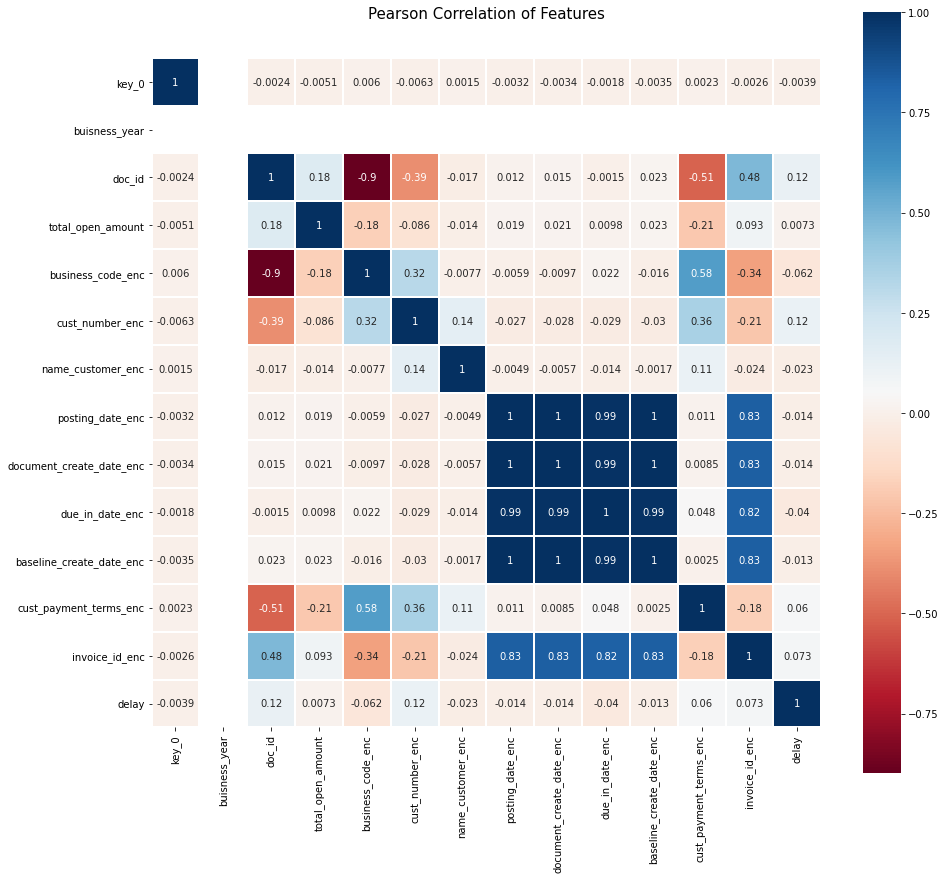

In [233]:
#corrmat = X_train.merge(Y_train , on = X_train.index).corr()
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(15,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [234]:
#Correlation with variable
corr_var = abs(X_train.corr()['invoice_id_enc'])
#Selecting highly correlated features
similar_features = corr_var[corr_var>0.5]
similar_features

posting_date_enc            0.829919
document_create_date_enc    0.831120
due_in_date_enc             0.822621
baseline_create_date_enc    0.834541
invoice_id_enc              1.000000
Name: invoice_id_enc, dtype: float64

In [235]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [236]:
sel.variances_

array([0.00000000e+00, 7.75015013e+16, 1.76189198e+09, 3.64399317e-01,
       5.71517985e+04, 1.21993123e+06, 6.43681339e+03, 6.43634928e+03,
       6.57938936e+03, 6.45026092e+03, 1.18252986e+02, 5.97774240e+07])

In [237]:
X_train,X_valid ,X_test = cricbuzz(['buisness_year'])

In [238]:
check_status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26783 entries, 32999 to 6701
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   doc_id                    26783 non-null  float64
 1   total_open_amount         26783 non-null  float64
 2   business_code_enc         26783 non-null  int32  
 3   cust_number_enc           26783 non-null  int32  
 4   name_customer_enc         26783 non-null  int32  
 5   posting_date_enc          26783 non-null  int32  
 6   document_create_date_enc  26783 non-null  int64  
 7   due_in_date_enc           26783 non-null  int64  
 8   baseline_create_date_enc  26783 non-null  int64  
 9   cust_payment_terms_enc    26783 non-null  int32  
 10  invoice_id_enc            26783 non-null  int64  
dtypes: float64(2), int32(5), int64(4)
memory usage: 1.9 MB
None
--------------------------------------------
(26783, 11) (5739, 11) (5740, 11)
------------Train Null Count-

# Modeling

### Create a basic model

In [239]:
from sklearn.linear_model import LinearRegression
basic_model = LinearRegression()
basic_model.fit(X_train, Y_train)

LinearRegression()

In [240]:
Y_predict = basic_model.predict(X_valid)

In [241]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_valid, Y_predict, squared=False)

6.769042201952799

In [242]:
rec = pd.DataFrame(zip(Y_predict , Y_test),columns=['Predicted','Actuals'])

In [243]:
(abs(rec.Predicted-rec.Actuals)/rec.Actuals).mean()

inf

# Tree based model

In [244]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [245]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [246]:
Y_predict1 = regressor.predict(X_valid)

In [247]:
mean_squared_error(Y_valid, Y_predict1, squared=False)

7.837526320722069

## X_test set is just to confirm that the model is not getting overfitted

In [248]:
Y_predict_test = regressor.predict(X_test)
mean_squared_error(Y_test, Y_predict_test, squared=False)

16.37996236971315

## The lost data

In [249]:
# see again delay is all nan
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45849,U001,CCCA02,KRAFT systems,NaT,2020,1.930544e+09,2020-02-27,2020-02-19,2020-04-02,USD,82143.60,2020-02-27,NAG2,1.930544e+09,1,NaN
46788,U001,0200769623,WAL-MAR llc,NaT,2020,1.930543e+09,2020-02-27,2020-02-19,2020-03-13,USD,2900.73,2020-02-27,NAH4,1.930543e+09,1,NaN
32211,U001,0200799367,MCL foundation,NaT,2020,1.930544e+09,2020-02-28,2020-02-19,2020-03-14,USD,21208.47,2020-02-28,NAA8,1.930544e+09,1,NaN
10629,U001,0200769623,WAL-MAR in,NaT,2020,1.930548e+09,2020-02-27,2020-02-20,2020-03-13,USD,3073.33,2020-02-27,NAH4,1.930548e+09,1,NaN
39679,U001,0200769623,WAL-MAR us,NaT,2020,1.930559e+09,2020-02-27,2020-02-23,2020-03-13,USD,66980.80,2020-02-27,NAH4,1.930559e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44869,CA02,0140104392,FLANAG llc,NaT,2020,2.960634e+09,2020-05-14,2020-05-14,2020-05-24,CAD,7032.80,2020-05-14,CA10,2.960634e+09,1,NaN
2564,CA02,0100056054,ACTIVE M associates,NaT,2020,2.960636e+09,2020-05-16,2020-05-16,2020-05-30,CAD,11210.71,2020-05-20,CA10,2.960636e+09,1,NaN
35383,CA02,0100027744,OMEGA AD corp,NaT,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,2.960634e+09,1,NaN
11282,CA02,0100056054,ACTIVE M,NaT,2020,2.960636e+09,2020-05-18,2020-05-18,2020-06-04,CAD,8368.79,2020-05-25,CA10,2.960636e+09,1,NaN


## pre-processing

### Null / constant / duplicate drop same steps

In [250]:
test_data.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9437
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
delay                   9437
dtype: int64

### drop delay column as we are going to predict that + its null

In [251]:
X_test_data = test_data.drop(['delay'],axis=1)
X_test_data

# also lets drop delay from test data itself
test_data.drop(['delay'], inplace =True,axis=1)

## Feature Engineering

In [252]:
temp = set(X_test_data['business_code'])-set(business_code_encoder.classes_)
for items in temp:
    business_code_encoder.classes_= np.append(business_code_encoder.classes_,items)

X_test_data['business_code_enc'] = business_code_encoder.transform(X_test_data['business_code'])

In [253]:
X_test_data['cust_number_enc'] = cust_number_encoder.fit_transform(X_test_data['cust_number'])
X_test_data['name_customer_enc'] = name_customer_encoder.fit_transform(X_test_data['name_customer'])
X_test_data['posting_date_enc'] = posting_date_encoder.fit_transform(X_test_data['posting_date'])
X_test_data['cust_payment_terms_enc'] = cust_payment_terms_encoder.fit_transform(X_test_data['cust_payment_terms'])
X_test_data['invoice_id_enc'] = invoice_id_encoder.fit_transform(X_test_data['invoice_id'])
X_test_data['document_create_date_enc'] = document_create_date_encoder.fit_transform(X_test_data['document_create_date'])
X_test_data['due_in_date_enc'] = due_in_date_encoder.fit_transform(X_test_data['due_in_date'])
X_test_data['baseline_create_date_enc'] = baseline_create_date_encoder.fit_transform(X_test_data['baseline_create_date'])

In [254]:
X_test_data['day_of_clearance'] = X_test_data['clear_date'].dt.day
X_test_data['month_of_clearance'] = X_test_data['clear_date'].dt.month
X_test_data['year_of_clearance'] = X_test_data['clear_date'].dt.year

In [255]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9437 entries, 45849 to 24868
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   business_code             9437 non-null   object        
 1   cust_number               9437 non-null   object        
 2   name_customer             9437 non-null   object        
 3   clear_date                0 non-null      datetime64[ns]
 4   buisness_year             9437 non-null   int32         
 5   doc_id                    9437 non-null   float64       
 6   posting_date              9437 non-null   object        
 7   document_create_date      9437 non-null   datetime64[ns]
 8   due_in_date               9437 non-null   datetime64[ns]
 9   invoice_currency          9437 non-null   object        
 10  total_open_amount         9437 non-null   float64       
 11  baseline_create_date      9437 non-null   datetime64[ns]
 12  cust_payment_te

In [256]:
X_test_data.drop(['business_code','cust_number','name_customer','clear_date','posting_date','document_create_date','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms'],inplace =True ,axis=1)

In [257]:
X_test_data.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'business_code_enc', 'cust_number_enc', 'name_customer_enc',
       'posting_date_enc', 'cust_payment_terms_enc', 'invoice_id_enc',
       'document_create_date_enc', 'due_in_date_enc',
       'baseline_create_date_enc', 'day_of_clearance', 'month_of_clearance',
       'year_of_clearance'],
      dtype='object')

In [258]:
X_train.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'cust_number_enc',
       'name_customer_enc', 'posting_date_enc', 'document_create_date_enc',
       'due_in_date_enc', 'baseline_create_date_enc', 'cust_payment_terms_enc',
       'invoice_id_enc'],
      dtype='object')

In [259]:
# remove 

X_test_data.drop(['buisness_year','invoice_id','isOpen','day_of_clearance',
       'month_of_clearance', 'year_of_clearance'],inplace =True ,axis=1)

# Final

In [260]:
# prediction

final_result = regressor.predict(X_test_data)

In [261]:
final_result = pd.Series(final_result,name='delay')

In [262]:
# resetting the index of main test so that we can merge delay series with it
test_data.reset_index(drop=True,inplace=True)

In [263]:
Final = test_data.merge(final_result , on = X_test_data.index )
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,45849,U001,CCCA02,KRAFT systems,NaT,2020,1.930544e+09,2020-02-27,2020-02-19,2020-04-02,USD,82143.60,2020-02-27,NAG2,1.930544e+09,1,-2.17754
1,46788,U001,0200769623,WAL-MAR llc,NaT,2020,1.930543e+09,2020-02-27,2020-02-19,2020-03-13,USD,2900.73,2020-02-27,NAH4,1.930543e+09,1,60.50000
2,32211,U001,0200799367,MCL foundation,NaT,2020,1.930544e+09,2020-02-28,2020-02-19,2020-03-14,USD,21208.47,2020-02-28,NAA8,1.930544e+09,1,60.50000
3,10629,U001,0200769623,WAL-MAR in,NaT,2020,1.930548e+09,2020-02-27,2020-02-20,2020-03-13,USD,3073.33,2020-02-27,NAH4,1.930548e+09,1,60.50000
4,39679,U001,0200769623,WAL-MAR us,NaT,2020,1.930559e+09,2020-02-27,2020-02-23,2020-03-13,USD,66980.80,2020-02-27,NAH4,1.930559e+09,1,60.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,44869,CA02,0140104392,FLANAG llc,NaT,2020,2.960634e+09,2020-05-14,2020-05-14,2020-05-24,CAD,7032.80,2020-05-14,CA10,2.960634e+09,1,8.00000
9433,2564,CA02,0100056054,ACTIVE M associates,NaT,2020,2.960636e+09,2020-05-16,2020-05-16,2020-05-30,CAD,11210.71,2020-05-20,CA10,2.960636e+09,1,8.00000
9434,35383,CA02,0100027744,OMEGA AD corp,NaT,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,2.960634e+09,1,8.00000
9435,11282,CA02,0100056054,ACTIVE M,NaT,2020,2.960636e+09,2020-05-18,2020-05-18,2020-06-04,CAD,8368.79,2020-05-25,CA10,2.960636e+09,1,8.00000


In [264]:
def customBinner(x): #bins the delay into buckets
    if x<0:
        return 'less than 0 days'
    elif 0<=x<=15:
        return '0 - 15 days'
    elif 15<x<=30:
        return '16 - 30 days'
    elif 30<x<=45:
        return '31 - 45 days'
    elif 45<x<=60:
        return '45 - 60 days'
    else:
        return 'more than 60 days'

In [265]:
Final['Final_bucket'] = Final['delay'].apply(customBinner)

In [266]:
Final['Final_bucket'].value_counts()

0 - 15 days          5393
less than 0 days     3888
more than 60 days     156
Name: Final_bucket, dtype: int64

# THE END OF INVOICE MANAGEMENT APPLICATION